In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import scipy.optimize as op

In [2]:
data = pd.read_csv("ex2data2.txt", names=["X1","X2","y"])

In [3]:
data.head()

,X1,X2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### Observing data

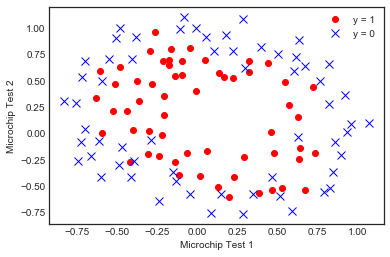

In [4]:
plt.plot(data[data.y==1].X1, data[data.y==1].X2, 'ko', markersize=6, c='r')
plt.plot(data[data.y==0].X1, data[data.y==0].X2, 'kx', markersize=8, c='b')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])
plt.show()

In [5]:
m, n = data.shape
X = np.hstack((np.ones((m)).reshape(m,1), data.iloc[:,0:2])) # 118x3
y = np.array(data['y']).reshape(m,1) # 118x1

### Adding new features

In [6]:
# Map feature - given X1,X2
# produce: X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2 ... till 6th degree

# accepts two numpy arrays in row form
def map_features(X1, X2):
    degree = 6;
    out = np.ones((X1.size,1))
    
    for i in range(1, degree+1):
        for j in range(0, i+1):
            new_feature = np.array((X1**(i-j)) * (X2**j))
            out = np.hstack((out, new_feature))
    
    return out

In [7]:
# first column [ones] + [X1] + [X2] + [new features]
X1 = np.array(data.X1).reshape(len(X),1) 
X2 = np.array(data.X2).reshape(len(X),1) 

X = map_features(X1, X2)
X.shape

(118, 28)

### Sigmoid, 0 <= h(x) <= 1

In [8]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

### Cost for a step and one step gradient functions

In [9]:
def cost_func_reg(theta, X, y, lambda_):
    m = len(X)
    h = sigmoid(np.dot(X, theta))
    J = 1/m * (np.dot((-y).T, np.log(h)) - np.dot((1-y).T, np.log(1-h)))
    J = J + lambda_/(2*m) * sum(theta[1:]**2)
    
    return np.ndarray.flatten(J)

In [10]:
def gradient_reg(theta, X, y, lambda_):
    m = len(X)
    h = sigmoid(np.dot(X, theta))
    
    grad_0 = 1/m * np.dot((h-y).T, X[:,0])
    grad_else = 1/m * np.dot(X[:,1:].T, (h-y)) + lambda_/m * theta[1:]
    
    grad = np.concatenate([grad_0, np.squeeze(grad_else)])
    
    return grad

### Initial cost and gradient for regularized logistic regression

In [11]:
initial_theta = np.zeros((X.shape[1])).reshape((X.shape[1],1)) # 28x1
lambda_ = 1

In [12]:
cost = cost_func_reg(initial_theta, X, y, lambda_)
print(cost)

[0.69314718]


In [13]:
grad = gradient_reg(initial_theta, X, y, lambda_)
print(grad[:5].round(4))

[0.0085 0.0188 0.0001 0.0503 0.0115]


### Advanced optimization using *scipy.optimize.minize*

In [14]:
optimal_theta = op.minimize(fun = cost_func_reg, 
                            x0 = initial_theta, 
                            method='BFGS',
                            args = (X, y, lambda_))

theta = np.array(optimal_theta.x)
print(theta[:5])

[ 1.14216773  0.6015967   1.16719496 -1.8713387  -0.91585431]


### Plot decision boundary

In [15]:
def plot_db(X1, X2, theta):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))

    for i in range(len(u)):
        for j in range(len(v)):
            ui = u[i].reshape(u[i].size,1)
            vj = u[j].reshape(u[j].size,1)
            z[i,j] = np.dot(map_features(ui, vj), theta)
            
    plt.contour(u, v, z, 0, colors='black')
    plt.plot(data[data.y==1].X1, data[data.y==1].X2, 'ko', markersize=6, c='r')
    plt.plot(data[data.y==0].X1, data[data.y==0].X2, 'kx', markersize=8, c='b')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(['y = 1', 'y = 0'])
    plt.show()

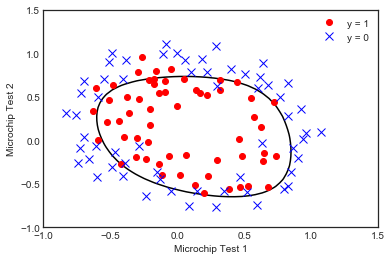

In [16]:
plot_db(X1,X2,theta)

### Predict

In [17]:
def predict(X, theta):
    return np.round(sigmoid(np.dot(X, theta)))

In [18]:
# testing X1 = 0.2, X2 = 0.2
# must be y = 1
a = np.array([0.2]).reshape(1,1)
b = np.array([0.2]).reshape(1,1)

test_X = map_features(a,b)

print(predict(test_X, theta))

[1.]


In [19]:
# testing X1 = 0.2, X2 = 0.9
# must be y = 0
a = np.array([0.2]).reshape(1,1)
b = np.array([0.9]).reshape(1,1)

test_X = map_features(a,b)

print(predict(test_X, theta))

[0.]


### Changing lambda parameter

### Overfitting

In [20]:
# no regularization
lambda_ = 0

optimal_theta = op.minimize(fun = cost_func_reg, 
                            x0 = initial_theta, 
                            method='BFGS',
                            args = (X, y, lambda_))

theta = np.array(optimal_theta.x)
print(theta[:5])

[  35.1645865    44.18780309   69.37667813 -344.86020383 -198.42131645]


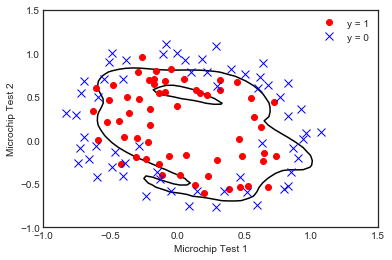

In [21]:
plot_db(X1,X2,theta)

### Underfitting

In [24]:
lambda_ = 100

optimal_theta = op.minimize(fun = cost_func_reg, 
                            x0 = initial_theta, 
                            method='BFGS',
                            args = (X, y, lambda_))

theta = np.array(optimal_theta.x)
print(theta[:5])

[ 0.00468518 -0.01727029  0.0064181  -0.05402536 -0.01327389]


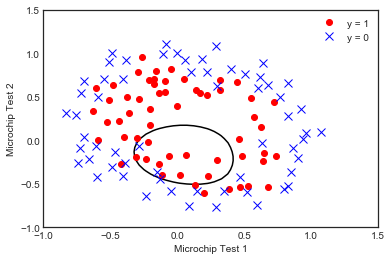

In [25]:
plot_db(X1,X2,theta)